# **Credit Card Fraud Detection**


**Project Description**

In this project , we are going to build models for detecting the fraud transactions of Credit Cards using the Automated Library 'dabl'

**dabl Library**:
1.   Python tool for Data Analysis and ML Automation.
2.   Automates the Data Preprocessing techniques and visualization part.
3.   Model performs training on the most commonly used Classification models and performs the Accuracy , precision and roc_auc for the data . Also, finds out the best model out of the performed classification models. 









**CONTENTS :**

**Part 1** - Installing the dabl Library

**Part 2**- Data Preprocessing with dabl Library

**Part 3** - Data Modelling using dabl Library

**Part 4** - Conclusion

# Part 1 - Installing the dabl Library

In [ ]:
pip install dabl 

     |████████████████████████████████| 563kB 2.9MB/s 
  Created wheel for dabl: filename=dabl-0.1.8-cp36-none-any.whl size=565077 sha256=ab2e26c02bef4ac43780eb9934b18d28bc7de0457db6e8e1a702526bbf8c830e
  Stored in directory: /root/.cache/pip/wheels/99/8c/79/9d33959b9b8676bf88a2e792075a2a17eda6b1711dc0fedca3
Successfully built dabl


Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dabl

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Due to privacy terms , the data columns original names are not revealed and have been scaled already

# Part 2 : Data PreProcessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69415 entries, 0 to 69414
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    69415 non-null  int64  
 1   V1      69415 non-null  float64
 2   V2      69415 non-null  float64
 3   V3      69415 non-null  float64
 4   V4      69415 non-null  float64
 5   V5      69415 non-null  float64
 6   V6      69415 non-null  float64
 7   V7      69415 non-null  float64
 8   V8      69415 non-null  float64
 9   V9      69415 non-null  float64
 10  V10     69415 non-null  float64
 11  V11     69415 non-null  float64
 12  V12     69415 non-null  float64
 13  V13     69415 non-null  float64
 14  V14     69414 non-null  float64
 15  V15     69414 non-null  float64
 16  V16     69414 non-null  float64
 17  V17     69414 non-null  float64
 18  V18     69414 non-null  float64
 19  V19     69414 non-null  float64
 20  V20     69414 non-null  float64
 21  V21     69414 non-null  float64
 22

NULL Value detection

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Treating the Missing Data

In [ ]:
null_columns=df.columns[df.isnull().any()]
null_columns

Index(['V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
(df[df['V14'].isnull()][null_columns])

,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
69414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[69414]

Time      53411.000000
V1            1.356225
V2           -0.322399
V3            0.450949
V4           -0.345147
V5           -0.784041
V6           -0.434317
V7           -0.485366
V8           -0.038548
V9           -1.212064
V10           0.890284
V11           0.969419
V12           0.628068
V13           0.492701
V14                NaN
V15                NaN
V16                NaN
V17                NaN
V18                NaN
V19                NaN
V20                NaN
V21                NaN
V22                NaN
V23                NaN
V24                NaN
V25                NaN
V26                NaN
V27                NaN
V28                NaN
Amount             NaN
Class              NaN
Name: 69414, dtype: float64

In [ ]:
df.loc[1984]

Time      1525.000000
V1          -0.342132
V2           1.091125
V3           1.282729
V4           0.068076
V5          -0.022498
V6          -0.996727
V7           0.676304
V8          -0.042250
V9          -0.312036
V10         -0.495759
V11         -0.304701
V12         -0.371575
V13         -0.432186
V14         -0.319778
V15          0.954139
V16          0.408194
V17          0.040089
V18         -0.071258
V19         -0.087687
V20          0.079272
V21         -0.269850
V22         -0.734148
V23         -0.007354
V24          0.319161
V25         -0.179146
V26          0.073683
V27          0.241932
V28          0.097139
Amount       3.590000
Class        0.000000
Name: 1984, dtype: float64

For data preprocessing in order to know the data types and its visualization we are going to do with 'dabl' Library

After looking at the data info , identify the datatypes of the columns with dabl

In [ ]:
db_clean = dabl.clean(df,verbose=1)

Detected feature types:
30 float, 1 int, 0 object, 0 date, 0 other
Interpreted as:
continuous      30
dirty_float      0
low_card_int     0
categorical      0
date             0
free_string      0
useless          1
dtype: int64


/usr/local/lib/python3.6/dist-packages/dabl/preprocessing.py:318: UserWarning: Discarding near-constant features: ['Class']
  near_constant.index[near_constant].tolist()))


The above data types indicates:

**continuous** - In our data as the data is sscaled already  , 
showing that the data is having only continuous values

**Dirty_float** - Float variables sometimes takes string values, here it is 0

**low_card_int** - Columns that contain integers with low cardinality falls under this (small int)

**date** - Date type data

**free_string** - strings data types contains multiple unique values

**useless** - Constants or integer values that dont match with any of the above categories falls under this


Our data is only having Continuous data type

#### To clearly see the type info about the feature types , like which column falls under which data type , follow the below

In [ ]:
type_info = dabl.detect_types(db_clean)
type_info

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Time,True,False,False,False,False,False,False
V1,True,False,False,False,False,False,False
V2,True,False,False,False,False,False,False
V3,True,False,False,False,False,False,False
V4,True,False,False,False,False,False,False
V5,True,False,False,False,False,False,False
V6,True,False,False,False,False,False,False
V7,True,False,False,False,False,False,False
V8,True,False,False,False,False,False,False
V9,True,False,False,False,False,False,False


To convert a particular column to another data type , follow the below code

In [ ]:
# db_clean = dabl.clean(df,type_hints={"V24":"categorical"})

Treating the Missing data

Removing the record with index number 1984 as most of the data from this record is missing

In [ ]:
 df = df.dropna()

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Visualization using dabl

/usr/local/lib/python3.6/dist-packages/dabl/plot/supervised.py:528: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification
Showing only top 10 of 30 continuous features


/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 286 outliers in column V17.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 99 outliers in column V14.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 127 outliers in column V3.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column V12.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 256 outliers in column V10.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column V16.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.6/dist-packages/dabl/plot/utils.py:621: UserWarning: 

Linear Discriminant Analysis training set score: 0.849


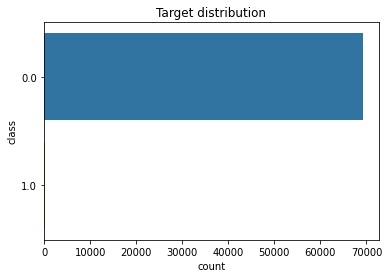

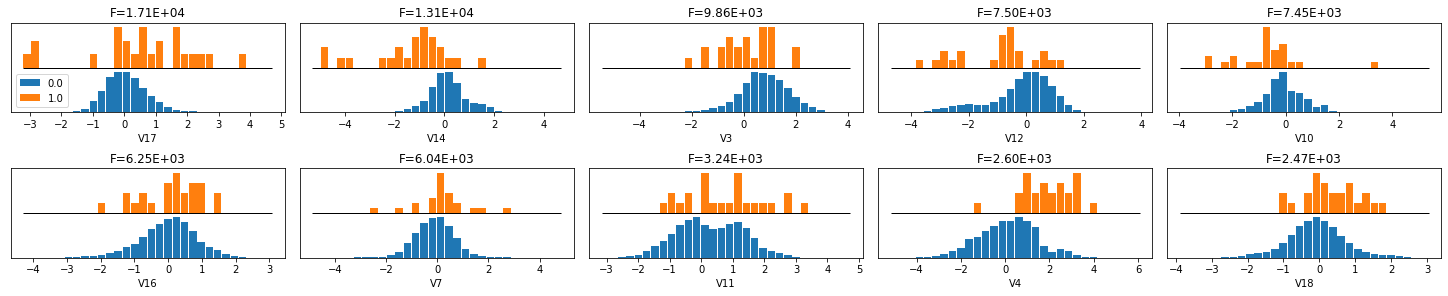

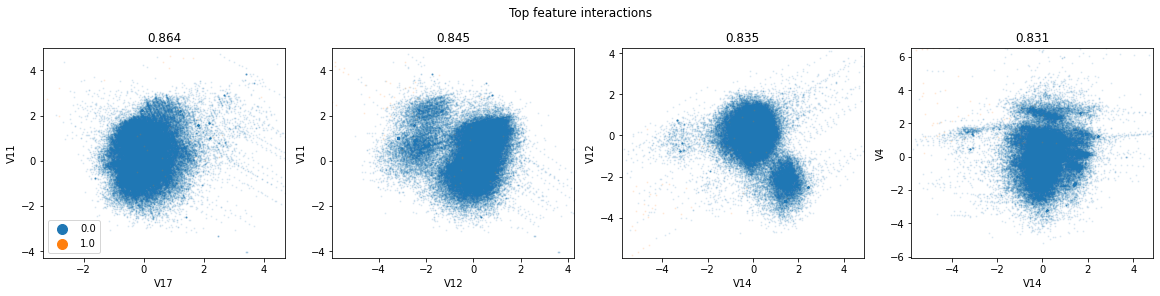

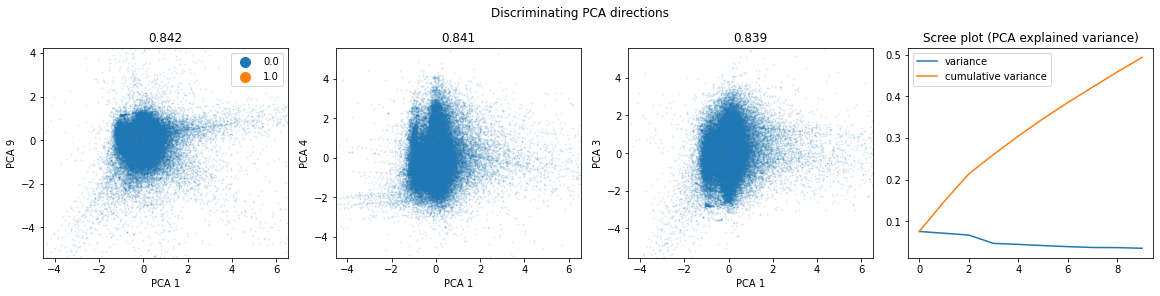

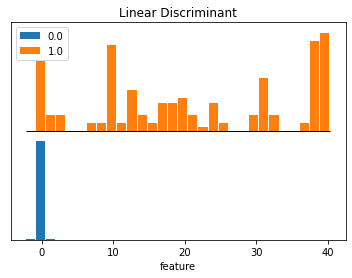

In [ ]:
dabl.plot(df,'Class')

Due to the use of dabl library , automatically outlier detection and outlier treatment has been done



1.   First Graph - Bar graph for the target values , in our data we have 2 categories 0 and 1s category
2.   Second Graph - Pair Plots for each column against target value for checking the distributions
3.   Third Graph - Scatter plot against the data with target values
4.   Fourth Graph - Overall commonly Distributed graph



### **Part 4 - Model Selection using dabl Library** 

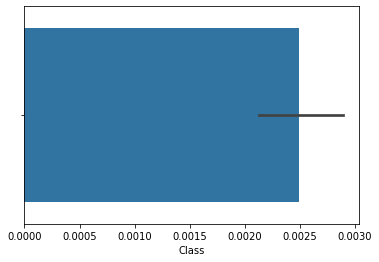

In [ ]:
sns.barplot(df['Class'])

In [ ]:
classifier = dabl.SimpleClassifier(random_state = 0)
x = df.drop('Class',axis=1)
y = df['Class']
classifier.fit(x,y)

Running DummyClassifier(strategy='prior')
accuracy: 0.998 average_precision: 0.002 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.499
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.998 average_precision: 0.002 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.499

Running GaussianNB()
accuracy: 0.981 average_precision: 0.137 roc_auc: 0.960 recall_macro: 0.924 f1_macro: 0.589
=== new best GaussianNB() (using recall_macro):
accuracy: 0.981 average_precision: 0.137 roc_auc: 0.960 recall_macro: 0.924 f1_macro: 0.589

Running MultinomialNB()
accuracy: 0.998 average_precision: 0.726 roc_auc: 0.968 recall_macro: 0.500 f1_macro: 0.499
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.981 average_precision: 0.098 roc_auc: 0.936 recall_macro: 0.936 f1_macro: 0.592
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.981 average_precision: 0.098 roc_auc: 0.936 recall_macro: 0.936 f

SimpleClassifier(random_state=0, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

**Part 5 - CONCLUSION**


From the above , we can conclude that the Logistic Regression Model predicts more accurate when compared to other Classification models.